In [1]:
# Classify Linearly Separable Dataset

In [2]:
import numpy as np                                                                     # For numerical operations and array handling.
import matplotlib.pyplot as plt                                                        # For plotting graphs and visualizations.

from sklearn.datasets import make_classification, make_moons, make_circles             # Import Dataset Generators from sklearn
from sklearn.model_selection import train_test_split                                   # Import train-test Split Function
from sklearn.metrics import accuracy_score                                             # Import Accuracy Score Metric

In [3]:
# Sigmoid Activation Function and its Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoidDerivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# ReLU Activation Function and its Derivative
def relu(x):
    return np.maximum(0, x)

def reluDerivative(x):
    return (x > 0).astype(float)

In [4]:
# Neural Network without Hidden Layers
def trainNoHidden(X, y, lr = 0.01, epochs = 1000):
    np.random.seed(42)
    weights = np.random.randn(X.shape[1], 1)
    bias = np.zeros((1,))

    print("With No Hidden Layer")
    for epoch in range(epochs):
        # Forward Pass
        z = np.dot(X, weights) + bias
        predictions = sigmoid(z).flatten()

        # Loss (Binary Cross-Entropy)
        loss = -np.mean(y * np.log(predictions + 1e-8) + (1 - y) * np.log(1 - predictions + 1e-8))

        # Backward Pass
        errors = predictions - y
        grad_weights = np.dot(X.T, errors.reshape(-1, 1)) / X.shape[0]
        grad_bias = np.mean(errors)

        # Update Weights
        weights -= lr * grad_weights
        bias -= lr * grad_bias

        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Training Loss: {loss:.4f}")

    return weights, bias

In [5]:
# Neural Network with One Hidden Layer
def trainWithHidden(X, y, hidden_neurons = 10, lr = 0.01, epochs = 1000, activation = "relu"):
    np.random.seed(42)
    input_neurons = X.shape[1]
    output_neurons = 1

    # Initialize Weights
    W1 = np.random.randn(input_neurons, hidden_neurons) * 0.1
    b1 = np.zeros((hidden_neurons,))
    W2 = np.random.randn(hidden_neurons, output_neurons) * 0.1
    b2 = np.zeros((output_neurons,))

    # Choose Activation Function
    act_fn = relu if activation == "relu" else sigmoid
    act_fn_derivative = reluDerivative if activation == "relu" else sigmoidDerivative

    print("\nHidden Layer")
    for epoch in range(epochs):
        # Forward Pass
        Z1 = np.dot(X, W1) + b1
        A1 = act_fn(Z1)
        Z2 = np.dot(A1, W2) + b2
        predictions = sigmoid(Z2).flatten()

        # Loss (Binary Cross-Entropy)
        loss = -np.mean(y * np.log(predictions + 1e-8) + (1 - y) * np.log(1 - predictions + 1e-8))

        # Backward Pass
        errors = predictions - y
        dZ2 = errors.reshape(-1, 1)
        dW2 = np.dot(A1.T, dZ2) / X.shape[0]
        db2 = np.mean(dZ2, axis=0)

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * act_fn_derivative(Z1)
        dW1 = np.dot(X.T, dZ1) / X.shape[0]
        db1 = np.mean(dZ1, axis=0)

        # Update Weights
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

        if epoch % 100 == 0 or epoch == epochs - 1:
            predictions_binary = (predictions > 0.5).astype(int)
            accuracy = accuracy_score(y, predictions_binary)
            print(f"Epoch {epoch}, Training Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    return W1, b1, W2, b2

In [6]:
# Predict Function
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    
    return (sigmoid(z) > 0.5).astype(int).flatten()

def predictWithHidden(X, W1, b1, W2, b2, activation="relu"):
    act_fn = relu if activation == "relu" else sigmoid
    A1 = act_fn(np.dot(X, W1) + b1)
    predictions = sigmoid(np.dot(A1, W2) + b2)
    
    return (predictions > 0.5).astype(int).flatten()

In [7]:
# Generate Datasets
linearly_separable_data = make_classification(n_samples = 500, n_features = 2, n_classes = 2, n_redundant = 0, n_clusters_per_class = 1, random_state = 42)
non_linear_moons = make_moons(n_samples = 500, noise = 0.1, random_state = 42)
non_linear_circles = make_circles(n_samples = 500, noise = 0.1, factor = 0.5, random_state = 42)

In [8]:
datasets = {"Linear": linearly_separable_data, "Moons": non_linear_moons, "Circles": non_linear_circles}

With No Hidden Layer
Epoch 0, Training Loss: 0.8121
Epoch 100, Training Loss: 0.3433
Epoch 200, Training Loss: 0.3248
Epoch 300, Training Loss: 0.3185
Epoch 400, Training Loss: 0.3154
Epoch 500, Training Loss: 0.3137
Epoch 600, Training Loss: 0.3127
Epoch 700, Training Loss: 0.3121
Epoch 800, Training Loss: 0.3117
Epoch 900, Training Loss: 0.3115
Epoch 999, Training Loss: 0.3113

Hidden Layer
Epoch 0, Training Loss: 0.6730, Accuracy: 0.5914
Epoch 100, Training Loss: 0.2928, Accuracy: 0.9057
Epoch 200, Training Loss: 0.2325, Accuracy: 0.9114
Epoch 300, Training Loss: 0.2131, Accuracy: 0.9114
Epoch 400, Training Loss: 0.2038, Accuracy: 0.9086
Epoch 500, Training Loss: 0.1988, Accuracy: 0.9086
Epoch 600, Training Loss: 0.1954, Accuracy: 0.9114
Epoch 700, Training Loss: 0.1928, Accuracy: 0.9229
Epoch 800, Training Loss: 0.1906, Accuracy: 0.9257
Epoch 900, Training Loss: 0.1891, Accuracy: 0.9257
Epoch 1000, Training Loss: 0.1878, Accuracy: 0.9257
Epoch 1100, Training Loss: 0.1869, Accuracy:

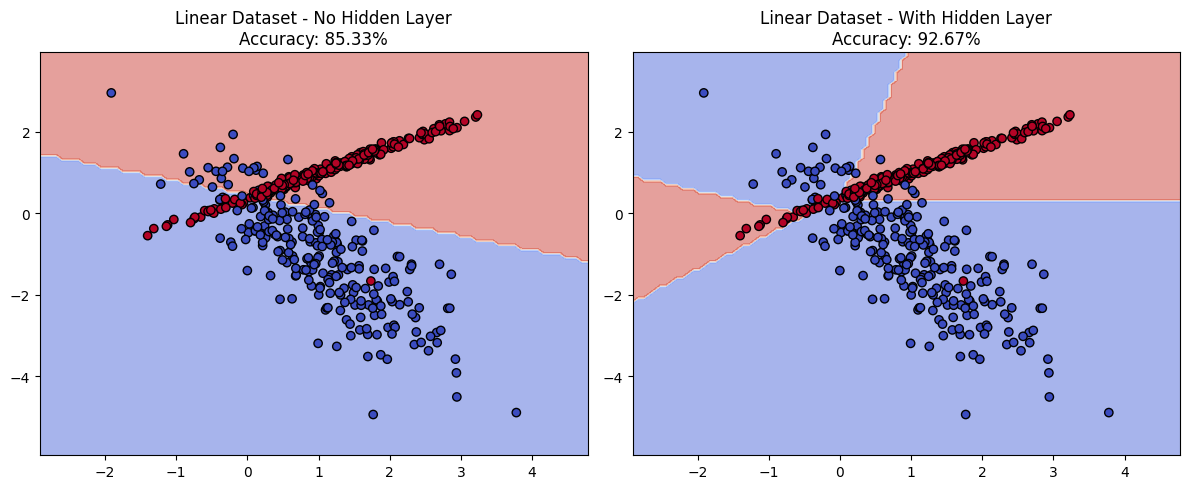

With No Hidden Layer
Epoch 0, Training Loss: 0.5761
Epoch 100, Training Loss: 0.3785
Epoch 200, Training Loss: 0.3309
Epoch 300, Training Loss: 0.3078
Epoch 400, Training Loss: 0.2936
Epoch 500, Training Loss: 0.2840
Epoch 600, Training Loss: 0.2771
Epoch 700, Training Loss: 0.2719
Epoch 800, Training Loss: 0.2680
Epoch 900, Training Loss: 0.2649
Epoch 999, Training Loss: 0.2625

Hidden Layer
Epoch 0, Training Loss: 0.7021, Accuracy: 0.3943
Epoch 100, Training Loss: 0.5644, Accuracy: 0.8114
Epoch 200, Training Loss: 0.3912, Accuracy: 0.8343
Epoch 300, Training Loss: 0.3183, Accuracy: 0.8629
Epoch 400, Training Loss: 0.2880, Accuracy: 0.8771
Epoch 500, Training Loss: 0.2733, Accuracy: 0.8743
Epoch 600, Training Loss: 0.2647, Accuracy: 0.8743
Epoch 700, Training Loss: 0.2585, Accuracy: 0.8743
Epoch 800, Training Loss: 0.2533, Accuracy: 0.8714
Epoch 900, Training Loss: 0.2486, Accuracy: 0.8743
Epoch 1000, Training Loss: 0.2439, Accuracy: 0.8743
Epoch 1100, Training Loss: 0.2390, Accuracy:

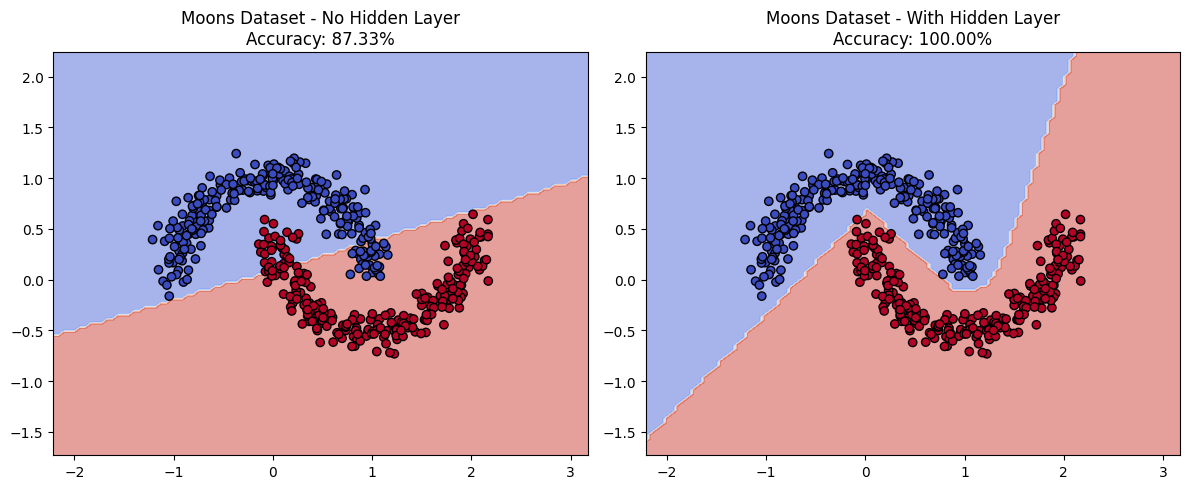

With No Hidden Layer
Epoch 0, Training Loss: 0.7044
Epoch 100, Training Loss: 0.6953
Epoch 200, Training Loss: 0.6936
Epoch 300, Training Loss: 0.6932
Epoch 400, Training Loss: 0.6931
Epoch 500, Training Loss: 0.6931
Epoch 600, Training Loss: 0.6931
Epoch 700, Training Loss: 0.6931
Epoch 800, Training Loss: 0.6931
Epoch 900, Training Loss: 0.6931
Epoch 999, Training Loss: 0.6931

Hidden Layer
Epoch 0, Training Loss: 0.6906, Accuracy: 0.5143
Epoch 100, Training Loss: 0.6857, Accuracy: 0.5571
Epoch 200, Training Loss: 0.6784, Accuracy: 0.5657
Epoch 300, Training Loss: 0.6678, Accuracy: 0.5743
Epoch 400, Training Loss: 0.6538, Accuracy: 0.6057
Epoch 500, Training Loss: 0.6358, Accuracy: 0.6343
Epoch 600, Training Loss: 0.6131, Accuracy: 0.6800
Epoch 700, Training Loss: 0.5812, Accuracy: 0.7486
Epoch 800, Training Loss: 0.5313, Accuracy: 0.8086
Epoch 900, Training Loss: 0.4614, Accuracy: 0.9457
Epoch 1000, Training Loss: 0.3896, Accuracy: 0.9800
Epoch 1100, Training Loss: 0.3281, Accuracy:

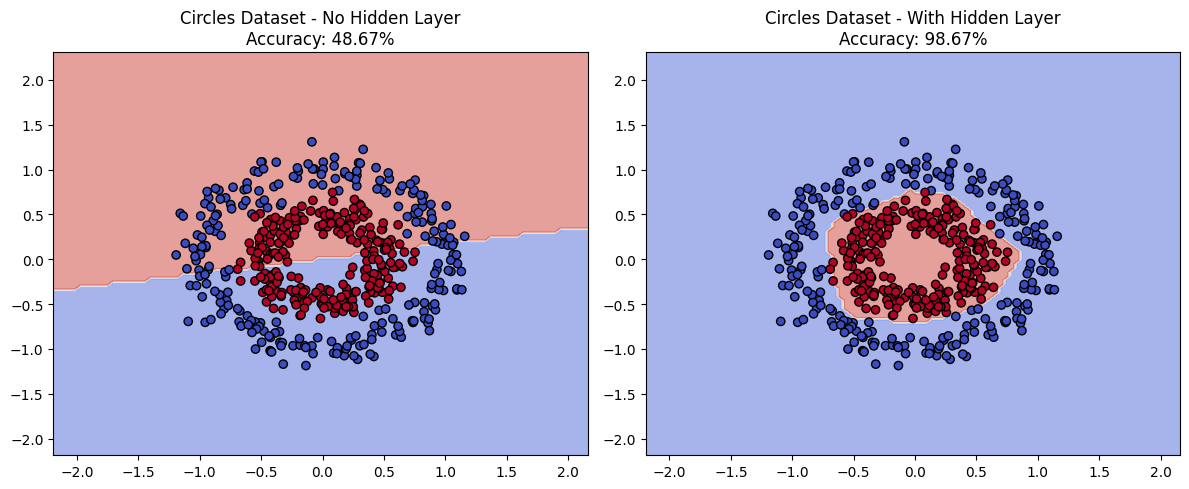

In [9]:
# Train and Evaluate Models
for name, data in datasets.items():
    X, y = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

    # Without Hidden Layer
    weights, bias = trainNoHidden(X_train, y_train, lr = 0.1, epochs = 1000)
    y_pred_no_hidden = predict(X_test, weights, bias)
    acc_no_hidden = accuracy_score(y_test, y_pred_no_hidden)

    # With Hidden Layer
    W1, b1, W2, b2 = trainWithHidden(X_train, y_train, hidden_neurons = 10, lr = 0.1, epochs = 4500, activation = "relu")
    y_pred_hidden = predictWithHidden(X_test, W1, b1, W2, b2, activation = "relu")
    acc_with_hidden = accuracy_score(y_test, y_pred_hidden)

    # Display Results
    print(f"\nDataset: {name}")
    print(f"Accuracy without  Hidden Layer: {acc_no_hidden * 100:.2f}%")
    print(f"Accuracy with Hidden Layer: {acc_with_hidden * 100:.2f}%\n")

    # Plot Decision Boundaries side by side
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]

    fig, axes = plt.subplots(1, 2, figsize = (12, 5))

    # Decision Boundary for No Hidden Layer
    zz_no_hidden = predict(grid, weights, bias).reshape(xx.shape)
    axes[0].contourf(xx, yy, zz_no_hidden, alpha = 0.5, cmap = "coolwarm")
    axes[0].scatter(X[:, 0], X[:, 1], c = y, edgecolor = "k", cmap = "coolwarm")
    axes[0].set_title(f"{name} Dataset - No Hidden Layer\nAccuracy: {acc_no_hidden * 100:.2f}%")

    # Decision Boundary for Hidden Layer
    zz_hidden = predictWithHidden(grid, W1, b1, W2, b2, activation = "relu").reshape(xx.shape)
    axes[1].contourf(xx, yy, zz_hidden, alpha = 0.5, cmap = "coolwarm")
    axes[1].scatter(X[:, 0], X[:, 1], c = y, edgecolor = "k", cmap = "coolwarm")
    axes[1].set_title(f"{name} Dataset - With Hidden Layer\nAccuracy: {acc_with_hidden * 100:.2f}%")

    # Adjust layout and display
    plt.tight_layout()
    plt.show()